In [2]:
import tensorflow as tf
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [3]:
#https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv
#link to download the CSV file
Iris=pd.read_csv(r'C:\Users\tilak\Desktop\MyPython\assignment\iris.csv')
Iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
Iris.shape

(150, 5)

In [5]:
#since we are gonna perform binary classification using Logistic Regression we will only include first 100 samples which consists of irises’ (Setosa and Versicolour)
Iris=Iris[Iris.index<100]
Iris.shape

(100, 5)

In [6]:
'''Step 2: Numerical processing
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1'''
for i in Iris.index:
    if i<50:
        Iris.iloc[i,4]=0
    else: 
        Iris.iloc[i,4]=1

In [7]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


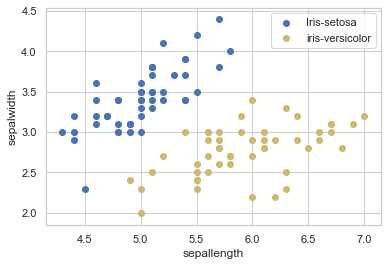

In [8]:
#visualization of given dataset
plt.scatter(Iris.iloc[0:50,0],Iris.iloc[0:50,1],color='b',label='Iris-setosa')
plt.scatter(Iris.iloc[50:100,0],Iris.iloc[50:100,1],color='y',label='iris-versicolor')
plt.xlabel('sepallength')
plt.ylabel('sepalwidth')
plt.legend(loc='best')

In [9]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output

In [10]:
'''Step 3: Split data
trainset: 80%
testset: 20%'''
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)
#randomnly select 80% of the indices under variable train_index and rest under test_index
train_index=np.random.choice(len(X),round(len(X)*0.8))
test_index = np.array(list(set(range(len(X))) - set(train_index)))


In [11]:
train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]

In [12]:
# Define the min-max normalization function
def min_max_normalized(data): # we are using here min-max normalisation, helpful to bring down every values in all the feature columns of the dataset to common scale 
 return(data-np.min(data,axis=0))/(np.max(data,axis=0)-np.min(data,axis=0))
train_X=min_max_normalized(train_X)
test_X=min_max_normalized(test_X)

In [13]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, so W's dimension is (4,1)
W=tf.Variable(tf.random_normal(shape=[4,1]))
b = tf.Variable(tf.random_normal(shape=[1, 1])) #bias
#constructor for random initialization
init=tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])#comment on the difference between tf.placeholder and tf.variable-----
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])#the difference :- we initialize variables and then modify them later but placeholder by default has a nonrestricted shape...placeholders donot need an initial value.For variables we define a shape a first but fr placeholders we dont do that (so we have a "none")  

In [15]:
# Declare the 'model' you need to learn
mod = tf.matmul(data, W) + b

In [16]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [147]:
# Define the learning rate， batch_size and number of iterations.
#learning_rate
learning_rate=0.001
#batch_size---- #using batch makes the training ------?
batch_size=30
#iter_num
iter_num=1500

In [142]:
# Define the optimizer with name opt
opt = tf.train.GradientDescentOptimizer(learning_rate)
# Define the goal
goal = opt.minimize(loss)

In [143]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [144]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []

In [145]:
# training model using mini-batch gradient descent
for epoch in range(iter_num):
    # Generate random batch_index
    batch_index = np.random.choice(len(train_X), size=batch_size)
     #randomnly picks up up 30 sample data from the train_X
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    #Similarly store train accuracy value for current epoch using sess.run
    temp_train_acc = sess.run(accuracy, feed_dict={data:train_X , target:np.matrix(train_y).T} )
    # recode the results of loss and train accuracy
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
  
    # output
    if (epoch + 1) % 100 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f}'.format(epoch + 1, temp_loss,temp_train_acc))
                                                                          
#Write the command to calculate test accuracy:
temp_test_acc = sess.run(accuracy, feed_dict={data:test_X , target:np.matrix(test_y).T})
print("The test accuracy is: {:5f}".format(temp_test_acc))

epoch:  100 loss: 0.004992 train_acc: 1.000000
epoch:  200 loss: 0.004176 train_acc: 1.000000
epoch:  300 loss: 0.005482 train_acc: 1.000000
epoch:  400 loss: 0.004361 train_acc: 1.000000
epoch:  500 loss: 0.006056 train_acc: 1.000000
epoch:  600 loss: 0.005331 train_acc: 1.000000
epoch:  700 loss: 0.003833 train_acc: 1.000000
epoch:  800 loss: 0.003891 train_acc: 1.000000
epoch:  900 loss: 0.003217 train_acc: 1.000000
epoch: 1000 loss: 0.005535 train_acc: 1.000000
epoch: 1100 loss: 0.005930 train_acc: 1.000000
epoch: 1200 loss: 0.003366 train_acc: 1.000000
epoch: 1300 loss: 0.003263 train_acc: 1.000000
epoch: 1400 loss: 0.003320 train_acc: 1.000000
epoch: 1500 loss: 0.002923 train_acc: 1.000000
The test accuracy is: 1.000000


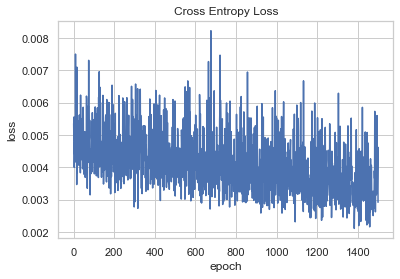

In [146]:
# Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

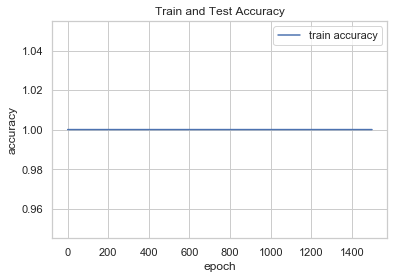

In [129]:
# plot for training accuracy
plt.plot(train_acc, label='train accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()
